<a href="https://colab.research.google.com/github/Oreki820/Projetos-EBAC/blob/main/Profissao_Cientista_de_Dados_M30_Pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 30 - K-Means
**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [13]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:

penguins = sns.load_dataset('penguins')

In [15]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1 - Nesse exercício vocês devem verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devem excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.

In [16]:
# Verificar valores faltantes
print(penguins.isnull().sum())

# Excluir linhas com valores faltantes
penguins_clean = penguins.dropna()

# Excluir colunas categóricas
penguins_kmeans = penguins_clean.drop(columns=['species', 'island', 'sex'])

# Verificar o dataset final
print(penguins_kmeans.head())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0


# 2 - Visualize a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

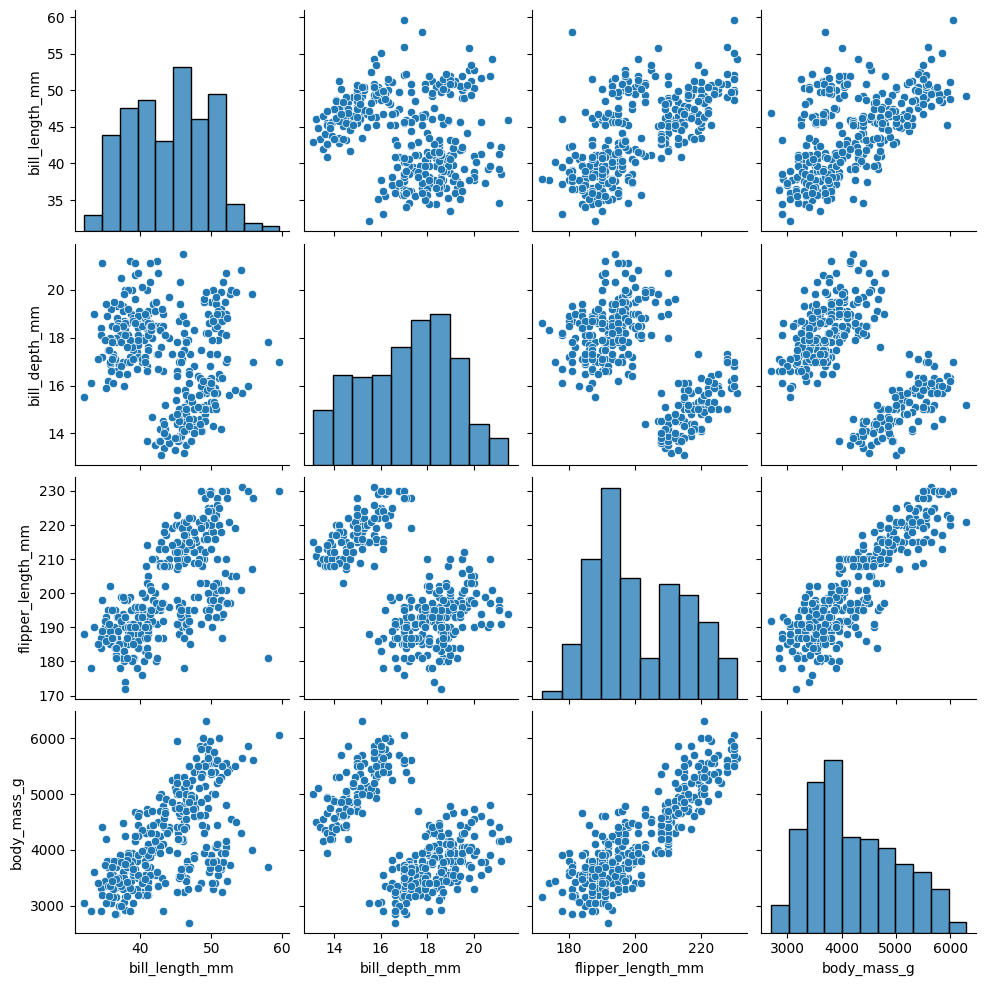

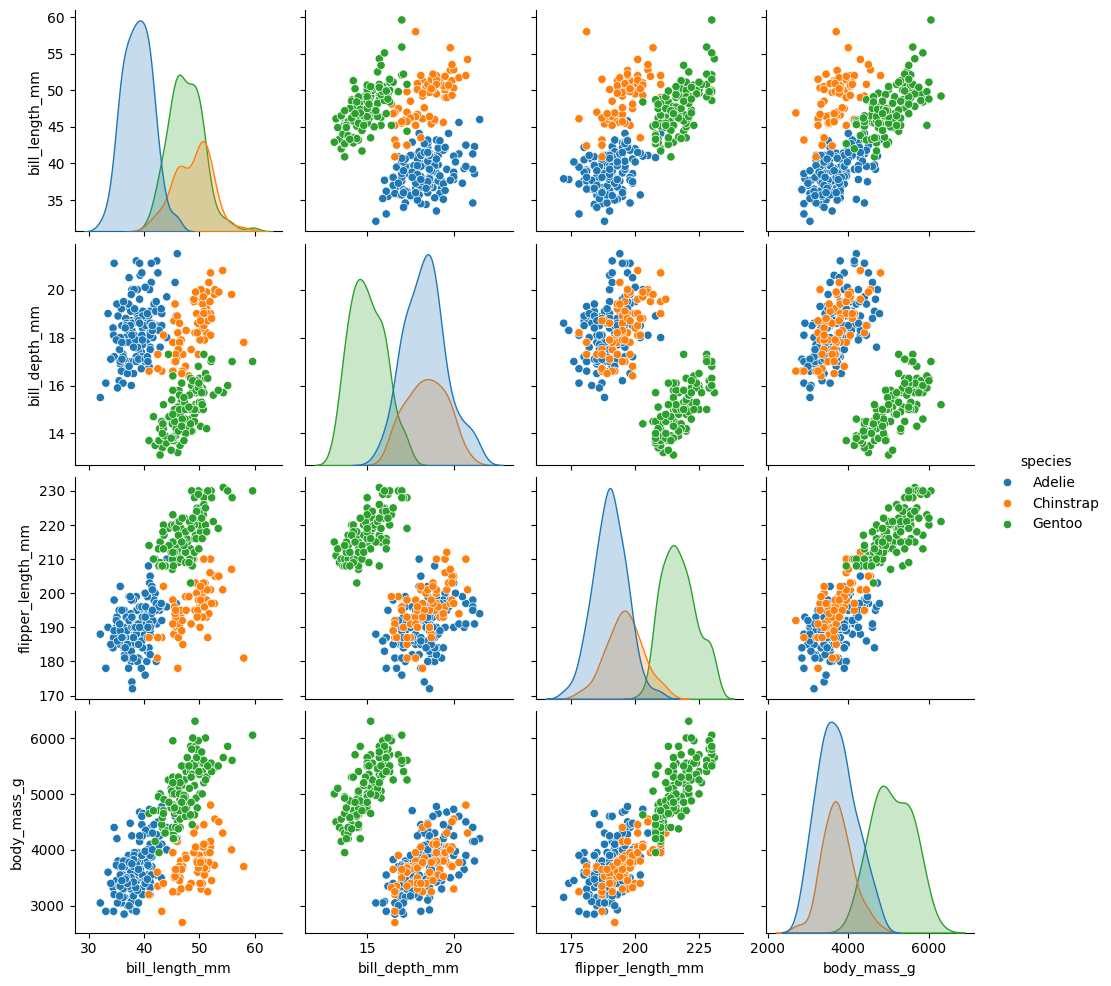

In [18]:
# Pairplot sem cores (apenas os dados numéricos)
sns.pairplot(penguins_kmeans)
plt.show()

# Pairplot com cores para as espécies reais (apenas para comparação)
sns.pairplot(penguins_clean, hue='species')
plt.show()

Sim, 3 Agrupamentos

# 3 - Realize a padronização dos dados e visualize os dados.

In [19]:
# Criar o scaler
scaler = StandardScaler()

# Ajustar e transformar os dados
penguins_scaled = scaler.fit_transform(penguins_kmeans)

# Transformar de volta em DataFrame para visualização
penguins_scaled_df = pd.DataFrame(penguins_scaled, columns=penguins_kmeans.columns)

# Visualizar os primeiros registros padronizados
print(penguins_scaled_df.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.896042       0.780732          -1.426752    -0.568475
1       -0.822788       0.119584          -1.069474    -0.506286
2       -0.676280       0.424729          -0.426373    -1.190361
3       -1.335566       1.085877          -0.569284    -0.941606
4       -0.859415       1.747026          -0.783651    -0.692852


# 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.

In [20]:
# Criar o modelo K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Treinar o modelo
kmeans.fit(penguins_scaled_df)

# Obter os rótulos dos clusters
labels = kmeans.labels_

# Adicionar os rótulos ao DataFrame original para análise
penguins_scaled_df['cluster'] = labels

# Visualizar os primeiros registros com o cluster
print(penguins_scaled_df.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  cluster
0       -0.896042       0.780732          -1.426752    -0.568475        0
1       -0.822788       0.119584          -1.069474    -0.506286        0
2       -0.676280       0.424729          -0.426373    -1.190361        0
3       -1.335566       1.085877          -0.569284    -0.941606        0
4       -0.859415       1.747026          -0.783651    -0.692852        0


# 5 - Construa pelo 2 matriz de dispersão como realizada em aula indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gráfico e em seguida escolha outras variaveis para o segundo.**

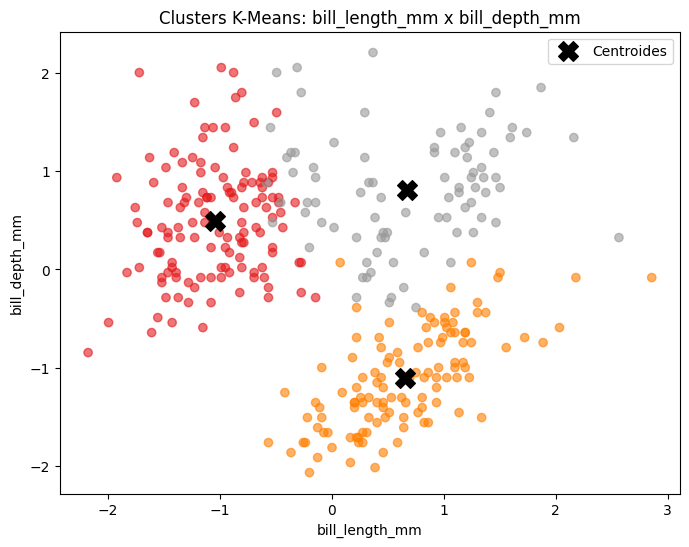

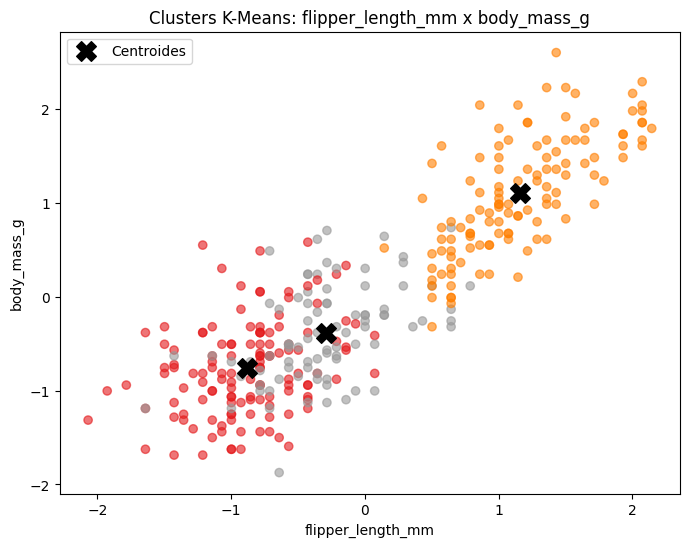

In [23]:
# Obter os centroides
centroids = kmeans.cluster_centers_

# Primeiro gráfico: bill_length_mm x bill_depth_mm
plt.figure(figsize=(8,6))
plt.scatter(penguins_scaled_df['bill_length_mm'], penguins_scaled_df['bill_depth_mm'], c=penguins_scaled_df['cluster'], cmap='Set1', alpha=0.6)
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='X', s=200, label='Centroides')
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.title('Clusters K-Means: bill_length_mm x bill_depth_mm')
plt.legend()
plt.show()

# Segundo gráfico: flipper_length_mm x body_mass_g
plt.figure(figsize=(8,6))
plt.scatter(penguins_scaled_df['flipper_length_mm'], penguins_scaled_df['body_mass_g'], c=penguins_scaled_df['cluster'], cmap='Set1', alpha=0.6)
plt.scatter(centroids[:,2], centroids[:,3], c='black', marker='X', s=200, label='Centroides')
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.title('Clusters K-Means: flipper_length_mm x body_mass_g')
plt.legend()
plt.show()


# 6 - Pesquise mais 3 utilidades de aplicações de algoritmos de clusterização e cite abaixo:

**1️⃣ Detecção de fraudes financeiras**

O que é: Algoritmos de clusterização podem organizar transações bancárias ou compras em grupos de comportamento “normal”.

Como funciona: Cada cliente ou transação tem características como valor, frequência, localização e horário. O algoritmo agrupa transações similares.

Benefício: Quando uma transação não se encaixa em nenhum grupo normal (por exemplo, uma compra enorme em outro país de madrugada), ela é marcada como possível fraude.

Exemplo: Um cartão de crédito normalmente usado no Brasil é de repente usado em outro continente; o sistema de clustering percebe que é um comportamento diferente e alerta o banco automaticamente.

---

**2️⃣ Agrupamento de documentos ou textos**

O que é: Clustering ajuda a organizar grandes volumes de textos ou notícias em grupos com temas parecidos.

Como funciona: Cada documento é transformado em números que representam palavras ou tópicos. O algoritmo então agrupa textos com palavras ou tópicos semelhantes.

Benefício: Permite que grandes quantidades de informação sejam analisadas rapidamente, sem precisar ler tudo.

Exemplo: Um portal de notícias pode automaticamente agrupar matérias sobre esportes, política, tecnologia ou saúde, ajudando o leitor a encontrar rapidamente o que interessa.

---

**3️⃣ Análise de imagens e reconhecimento de padrões**

O que é: Clustering é usado para identificar regiões ou objetos semelhantes dentro de imagens.

Como funciona: Cada pixel ou grupo de pixels recebe características como cor, intensidade ou textura. O algoritmo agrupa pixels com características parecidas, formando regiões ou padrões.

Benefício: Facilita diagnósticos médicos, organização de fotos ou identificação de objetos.

Exemplo: Em uma ressonância magnética, regiões que parecem anormais (como tumores) podem ser detectadas porque não se encaixam nos clusters de tecido saudável. Em fotos de satélite, áreas de floresta, água ou cidade podem ser separadas automaticamente.

# **Meu Modulo Extra**

Só Testando Algumas Coisas e Matando a Curiosidade kkk

In [28]:
# Criar hover customizado
hover_text = [
    f"Bill Length: {bl:.1f} mm<br>Bill Depth: {bd:.1f} mm<br>Flipper: {fl:.1f} mm<br>Body Mass: {bm:.0f} g"
    for bl, bd, fl, bm in zip(
        penguins_scaled_df['bill_length_mm'],
        penguins_scaled_df['bill_depth_mm'],
        penguins_scaled_df['flipper_length_mm'],
        penguins_scaled_df['body_mass_g']
    )
]

# Ajustar tamanho para ser positivo
sizes = penguins_scaled_df['flipper_length_mm'] - penguins_scaled_df['flipper_length_mm'].min() + 1

# Criar gráfico interativo com emoji
fig = px.scatter(
    penguins_scaled_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    text=['🐧']*len(penguins_scaled_df),  # um pinguim por ponto
    color=penguins_scaled_df['cluster'].astype(str),
    size=sizes,
    hover_name=hover_text
)

# Adicionar centroides
centroids = kmeans.cluster_centers_
fig.add_scatter(
    x=centroids[:,0],
    y=centroids[:,1],
    mode='markers',
    marker=dict(size=30, color='black', symbol='x'),
    name='Centroides'
)

# Ajustes finais
fig.update_traces(textposition='middle center')
fig.update_layout(title='Clusters K-Means de Pinguins com Centroides')
fig.show()

Objetivo do gráfico:
O gráfico foi criado para visualizar de forma interativa os clusters gerados pelo algoritmo K-Means aplicados aos dados dos pinguins. Cada ponto representa um pinguim, com a posição determinada pelas variáveis bill_length_mm (comprimento do bico) e bill_depth_mm (profundidade do bico). Os emojis de pinguins foram utilizados para tornar a visualização mais intuitiva e lúdica.

Intenção da análise:

Avaliar como o K-Means agrupou os pinguins com base nas características físicas, permitindo identificar se os clusters correspondem às espécies reais.

Destacar visualmente os centroides de cada cluster, que representam o “ponto médio” das características de cada grupo, facilitando a interpretação dos padrões do conjunto de dados.

Demonstrar o efeito da padronização das variáveis, garantindo que todas as características influenciem igualmente na formação dos clusters.

Resultados e interpretações possíveis:

É possível perceber que os pinguins tendem a se agrupar em três clusters distintos, o que corresponde ao número de espécies presentes no dataset.

Diferenças nos comprimentos e profundidades do bico são eficazes para separar os grupos, mostrando que essas variáveis são boas para diferenciar espécies.

A utilização de um gráfico interativo permite explorar cada ponto individualmente, observando os valores de todas as medidas do pinguim, o que pode ajudar em análises mais detalhadas.

Justificativa da escolha do gráfico:
A escolha de um gráfico interativo com emojis e centroides teve como objetivo facilitar a compreensão visual do agrupamento, tornando a análise mais acessível e didática. Além disso, o uso de centroids permite entender a posição média de cada cluster e avaliar rapidamente a qualidade do agrupamento.

In [30]:
# Ajustar tamanho para scatter3d
sizes_3d = penguins_scaled_df['body_mass_g'] - penguins_scaled_df['body_mass_g'].min() + 1

# Gráfico 3D com tamanho ajustado
fig = px.scatter_3d(
    penguins_scaled_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    z='flipper_length_mm',
    color=penguins_scaled_df['cluster'].astype(str),
    text=['🐧']*len(penguins_scaled_df),
    size=sizes_3d,
    hover_name=hover_text
)
fig.update_traces(textposition='top center')
fig.update_layout(title='Clusters K-Means de Pinguins em 3D')
fig.show()


Objetivo do gráfico:
O gráfico 3D foi criado para visualizar interativamente os clusters identificados pelo algoritmo K-Means, considerando três variáveis simultaneamente: bill_length_mm (comprimento do bico), bill_depth_mm (profundidade do bico) e flipper_length_mm (comprimento da barbatana). Cada ponto representa um pinguim, e os emojis foram utilizados para tornar a visualização mais intuitiva e lúdica.

Intenção da análise:

Avaliar como os pinguins se distribuem no espaço tridimensional com base em características físicas, permitindo identificar padrões e agrupamentos.

Observar se os clusters correspondem ao número de espécies presentes no dataset, verificando a capacidade do K-Means de separar grupos naturais.

Demonstrar a utilidade da visualização interativa 3D, que permite rotacionar, aproximar e explorar cada ponto individualmente para uma análise mais detalhada.

Resultados e interpretações possíveis:

É possível perceber a formação de três clusters distintos, sugerindo que as medidas selecionadas são eficazes para diferenciar espécies de pinguins.

O gráfico permite identificar quais pinguins estão próximos dos centroides de cada cluster e quais estão mais distantes, ajudando a detectar possíveis outliers ou casos intermediários.

O uso de hover detalhado facilita a análise de cada ponto, mostrando todas as características do pinguim selecionado.

Justificativa da escolha do gráfico:
A opção pelo gráfico 3D interativo proporciona uma visão mais completa do agrupamento, permitindo observar padrões que poderiam não ser evidentes em gráficos 2D. A utilização de emojis e cores diferentes por cluster torna o gráfico didático e visualmente atrativo, ideal para demonstração em atividades educacionais.

In [32]:
import plotly.graph_objects as go
import pandas as pd

# Ajustar tamanho positivo
sizes_3d = penguins_scaled_df['flipper_length_mm'] - penguins_scaled_df['flipper_length_mm'].min() + 10

# Criar hover detalhado
hover_text = [
    f"Bill Length: {bl:.1f} mm<br>Bill Depth: {bd:.1f} mm<br>Flipper: {fl:.1f} mm<br>Body Mass: {bm:.0f} g"
    for bl, bd, fl, bm in zip(
        penguins_scaled_df['bill_length_mm'],
        penguins_scaled_df['bill_depth_mm'],
        penguins_scaled_df['flipper_length_mm'],
        penguins_scaled_df['body_mass_g']
    )
]

# Criar gráfico 3D
fig = go.Figure()

# Adicionar pinguins com emoji
for i, cluster in enumerate(penguins_scaled_df['cluster']):
    fig.add_trace(go.Scatter3d(
        x=[penguins_scaled_df['bill_length_mm'].iloc[i]],
        y=[penguins_scaled_df['bill_depth_mm'].iloc[i]],
        z=[penguins_scaled_df['flipper_length_mm'].iloc[i]],
        mode='text',
        text=['🐧'],
        textfont=dict(size=sizes_3d.iloc[i], color=['blue','red','green'][cluster]),
        hovertext=hover_text[i],
        hoverinfo='text'
    ))

# Adicionar centroides
centroids = kmeans.cluster_centers_
fig.add_trace(go.Scatter3d(
    x=centroids[:,0],
    y=centroids[:,1],
    z=centroids[:,2],
    mode='markers+text',
    marker=dict(size=25, color='black', symbol='x'),
    text=['Centroid 1','Centroid 2','Centroid 3'],
    textposition='top center',
    name='Centroides'
))

# Conectar cada pinguim ao centro do cluster (opcional)
for i, cluster in enumerate(penguins_scaled_df['cluster']):
    fig.add_trace(go.Scatter3d(
        x=[penguins_scaled_df['bill_length_mm'].iloc[i], centroids[cluster,0]],
        y=[penguins_scaled_df['bill_depth_mm'].iloc[i], centroids[cluster,1]],
        z=[penguins_scaled_df['flipper_length_mm'].iloc[i], centroids[cluster,2]],
        mode='lines',
        line=dict(color='gray', width=1),
        showlegend=False
    ))

# Layout decorativo com “gelo/Antártica”
fig.update_layout(
    scene=dict(
        xaxis_title='Bill Length',
        yaxis_title='Bill Depth',
        zaxis_title='Flipper Length',
        xaxis=dict(backgroundcolor="lightblue"),
        yaxis=dict(backgroundcolor="lightcyan"),
        zaxis=dict(backgroundcolor="aliceblue")
    ),
    title='Ultra Pinguim 3D - Clusters K-Means',
    showlegend=False,
    paper_bgcolor='lavender'
)

fig.show()


🔹 O que esse gráfico faz:

Cada pinguim é um emoji colorido por cluster.

Centroides são destacados com X preto e nomeados.

Hover mostra todas as características do pinguim.

Linhas cinza conectam cada pinguim ao seu centroide, mostrando visualmente a proximidade ao cluster.

Fundo azul claro simula gelo/Antártica.

Tamanhos dos emojis refletem o comprimento da barbatana (ou corpo).

**Encerramento do Módulo Bônus Criado Por Mim**

Ao longo deste módulo bônus, explorei de forma prática e interativa o algoritmo K-Means aplicado aos dados dos pinguins. Minha intenção foi ir além do estudo tradicional de clusters, permitindo que eu visualizasse os agrupamentos de forma clara e divertida, tanto em gráficos 2D quanto 3D.

Utilizei centroides, hover detalhado, tamanhos proporcionais e até emojis de pinguins, tornando a análise mais intuitiva e engajante. Essa abordagem me ajudou a compreender melhor como o K-Means separa os dados em clusters e a identificar padrões nas características físicas dos pinguins.

Durante o exercício, aprendi a importância da padronização de dados, da interpretação de clusters e centroides, e da customização de gráficos interativos, habilidades que posso aplicar em diferentes contextos, não apenas em biologia, mas em qualquer área que envolva análise de dados.

Ao final, percebi que técnicas estatísticas complexas podem se tornar muito mais intuitivas e divertidas quando combinadas com visualizações criativas, transformando o aprendizado em uma experiência prática, interativa e memorável.

Fiz este módulo pra explorar um pouco da curisidade que eu tava, orbigado pela atenção.